<a href="https://colab.research.google.com/github/iota07/jupyter-notebooks/blob/main/03_CNN_and_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

# Get the data

The images we're working with are from the Food101 dataset (101  different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** We start with a smaller dataset so we can experiment quickly and figure what workds (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-04-05 09:00:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.207, 173.194.211.207, 173.194.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  82.8MB/s    in 1.3s    

2024-04-05 09:00:38 (82.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for computer vision project... this usually means visualizing many sdamples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# Walk through pizza_steak  directory and list number of filesµ
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectories.
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape: {img.shape}") # show the shape of the image

  return img

['545561.jpg']
image shape: (512, 512, 3)


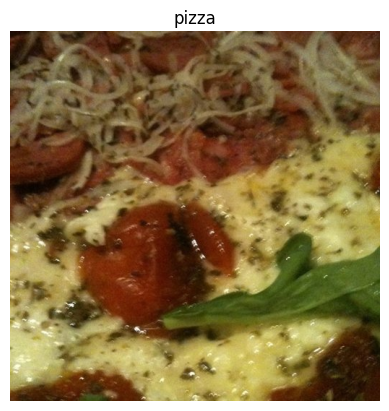

In [9]:
# View a random image from the training datasetµ
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

array([[[26,  7,  3],
        [26,  7,  3],
        [26,  7,  3],
        ...,
        [72, 33, 18],
        [77, 38, 23],
        [73, 34, 19]],

       [[30, 11,  7],
        [29, 10,  6],
        [29, 10,  6],
        ...,
        [68, 29, 14],
        [69, 30, 15],
        [74, 35, 20]],

       [[31, 13,  9],
        [30, 12,  8],
        [30, 13,  6],
        ...,
        [71, 34, 18],
        [67, 29, 16],
        [73, 35, 22]],

       ...,

       [[81, 41, 15],
        [89, 50, 21],
        [97, 58, 29],
        ...,
        [55, 24,  4],
        [54, 23,  3],
        [55, 24,  4]],

       [[80, 43, 17],
        [87, 50, 23],
        [92, 55, 26],
        ...,
        [54, 23,  3],
        [54, 23,  3],
        [56, 25,  5]],

       [[89, 53, 27],
        [90, 55, 27],
        [89, 52, 25],
        ...,
        [55, 24,  4],
        [58, 27,  7],
        [62, 31, 11]]], dtype=uint8)
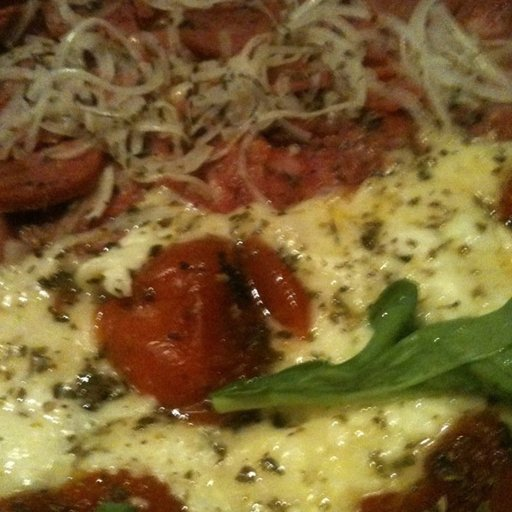

In [10]:
img

In [11]:
img.dtype

dtype('uint8')

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[26,  7,  3],
        [26,  7,  3],
        [26,  7,  3],
        ...,
        [72, 33, 18],
        [77, 38, 23],
        [73, 34, 19]],

       [[30, 11,  7],
        [29, 10,  6],
        [29, 10,  6],
        ...,
        [68, 29, 14],
        [69, 30, 15],
        [74, 35, 20]],

       [[31, 13,  9],
        [30, 12,  8],
        [30, 13,  6],
        ...,
        [71, 34, 18],
        [67, 29, 16],
        [73, 35, 22]],

       ...,

       [[81, 41, 15],
        [89, 50, 21],
        [97, 58, 29],
        ...,
        [55, 24,  4],
        [54, 23,  3],
        [55, 24,  4]],

       [[80, 43, 17],
        [87, 50, 23],
        [92, 55, 26],
        ...,
        [54, 23,  3],
        [54, 23,  3],
        [56, 25,  5]],

       [[89, 53, 27],
        [90, 55, 27],
        [89, 52, 25],
        ...,
        [55, 24,  4],
        [58, 27,  7],
        [62, 31, 11]]], dtype=uint8)>

In [13]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [14]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.10196078, 0.02745098, 0.01176471],
        [0.10196078, 0.02745098, 0.01176471],
        [0.10196078, 0.02745098, 0.01176471],
        ...,
        [0.28235294, 0.12941176, 0.07058824],
        [0.30196078, 0.14901961, 0.09019608],
        [0.28627451, 0.13333333, 0.0745098 ]],

       [[0.11764706, 0.04313725, 0.02745098],
        [0.11372549, 0.03921569, 0.02352941],
        [0.11372549, 0.03921569, 0.02352941],
        ...,
        [0.26666667, 0.11372549, 0.05490196],
        [0.27058824, 0.11764706, 0.05882353],
        [0.29019608, 0.1372549 , 0.07843137]],

       [[0.12156863, 0.05098039, 0.03529412],
        [0.11764706, 0.04705882, 0.03137255],
        [0.11764706, 0.05098039, 0.02352941],
        ...,
        [0.27843137, 0.13333333, 0.07058824],
        [0.2627451 , 0.11372549, 0.0627451 ],
        [0.28627451, 0.1372549 , 0.08627451]],

       ...,

       [[0.31764706, 0.16078431, 0.05882353],
        [0.34901961, 0.19607843, 0.08235294],
        [0.38039216, 0

## An end-to-end example

Let's build a convolutional neural network to find our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile CNN
* Fit the CNN to our training data


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our directory
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Buid a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 168ms/step - loss: 0.5629 - accuracy: 0.7260 - val_loss: 0.4532 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4342 - accuracy: 0.8033 - val_loss: 0.3687 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4261 - accuracy: 0.8113 - val_loss: 0.3838 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3518 - accuracy: 0.8607 - val_loss: 0.3013 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3174 - accuracy: 0.8693 - val_loss: 0.3313 - val_accuracy: 0.8460


*Note:** If the above cell is taking longer than ~10 seconds per epochs, make sure you're using a GPU by going to Runtime -> Hardware Accelerator -> GPU (you may have to rerun some cells above)

In [16]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data. The model we're building is from the Tensorflow playground
---




In [17]:
train_data

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 108ms/step - loss: 0.8129 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 158ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [19]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... Let's try to improve it.

In [20]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 134ms/step - loss: 5.1693 - accuracy: 0.6067 - val_loss: 1.4759 - val_accuracy: 0.6380
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 1.3633 - accuracy: 0.6613 - val_loss: 0.7479 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 7s 139ms/step - loss: 0.7081 - accuracy: 0.7127 - val_loss: 0.7316 - val_accuracy: 0.7220
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.7822 - accuracy: 0.7013 - val_loss: 0.7805 - val_accuracy: 0.6800
Epoch 5/5
47/47 [==============================] - 5s 108ms/step - loss: 0.5357 - accuracy: 0.7580 - val_loss: 0.8450 - val_accuracy: 0.6960


In [21]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note:** You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference, here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even thought these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

## Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepare it for our model, the main step here was scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different paramaters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

# 1. Become one with the data

['493029.jpg']
image shape: (384, 512, 3)
['3000535.jpg']
image shape: (512, 512, 3)


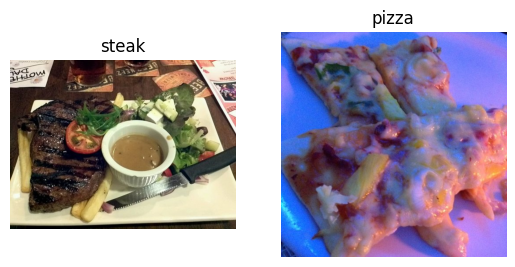

In [22]:
# Visualize data
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
steak_img =  view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# 2. Preprocess the data (prepare it for a model)

In [23]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
  1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
  2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...https://x.com/ylecun/status/989610208497360896?s=20


In [24]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [25]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory for images
                                               target_size=(224,224), # target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there?
len(train_data)

47

In [28]:
1500/32

46.875

In [29]:
# Get the firs two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [30]:
images[7].shape

(224, 224, 3)

In [31]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3.  Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result
that you setup when beginning a machine learning experiment
and then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [32]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,  # filter is the number of sliding windows going across an input  (higher= more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1,  # the size of the step the sliding takes across an input
           padding="valid", # if 'same' output shape is same as input shape, if 'valid' output shape is compressed.
           activation="relu",
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

**Practice**: Understand what's going on in a Conv2D layer by going through the CNN explainer:
https://poloclub.github.io/cnn-explainer/

In [34]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [35]:
# Get the summary of the model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [36]:
# Check  the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 141ms/step - loss: 0.6837 - accuracy: 0.6427 - val_loss: 0.4546 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4273 - accuracy: 0.8207 - val_loss: 0.5972 - val_accuracy: 0.6840
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.3482 - accuracy: 0.8667 - val_loss: 0.3924 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 6s 128ms/step - loss: 0.1396 - accuracy: 0.9513 - val_loss: 0.5114 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.0456 - accuracy: 0.9900 - val_loss: 0.7668 - val_accuracy: 0.7780


## 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

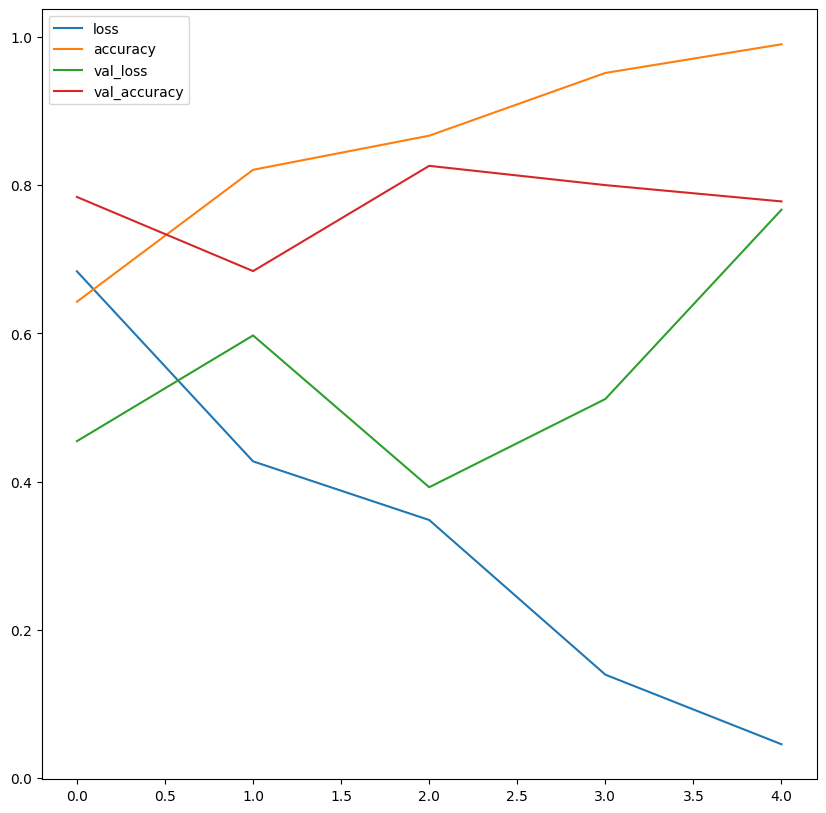

In [38]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,10))

In [39]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs= range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

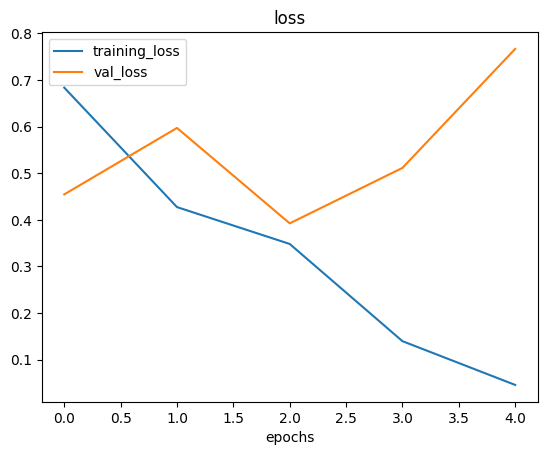

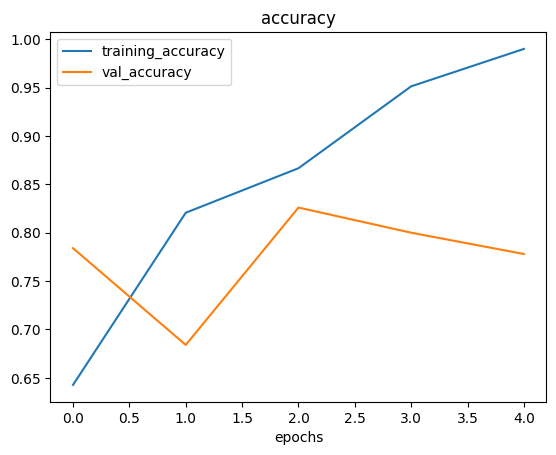

In [40]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished.

## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increasing the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPoll2D )
* Add more data...


**Note:** Reducing overfitting is also known as regularization.

In [41]:
# Create the model
model_5 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])

In [42]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [43]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 127ms/step - loss: 0.6176 - accuracy: 0.6500 - val_loss: 0.4710 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4791 - accuracy: 0.7873 - val_loss: 0.3922 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4402 - accuracy: 0.8093 - val_loss: 0.3694 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4132 - accuracy: 0.8173 - val_loss: 0.4056 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.3987 - accuracy: 0.8213 - val_loss: 0.3325 - val_accuracy: 0.8740


In [44]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [45]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


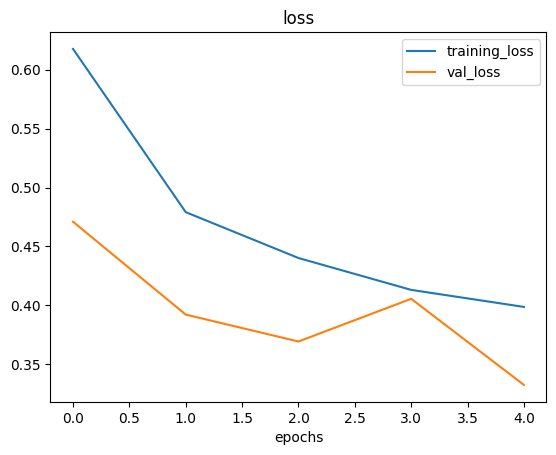

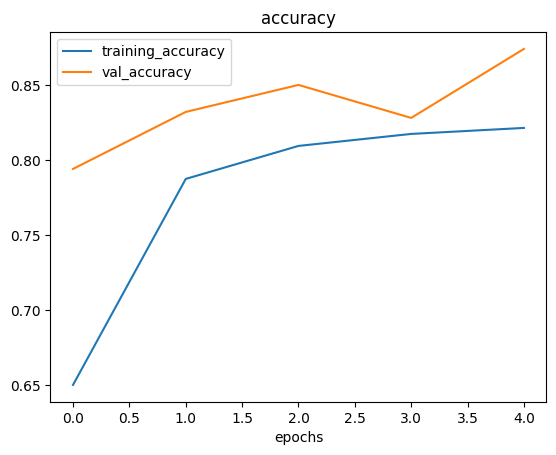

In [46]:
# Plot loss curves
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmentation

In [47]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True
                                             )

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator withtout data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully), patterns. Altering might mean adjusting the rotation of an image,
flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [48]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purpose only

# Create non augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE=(224,224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.

Finally... Let's visuaize some augmented data!

In [49]:
# Get sample data batch data.netx()
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: label aren't augmented only data (images)

showing image number: 7


(-0.5, 223.5, 223.5, -0.5)

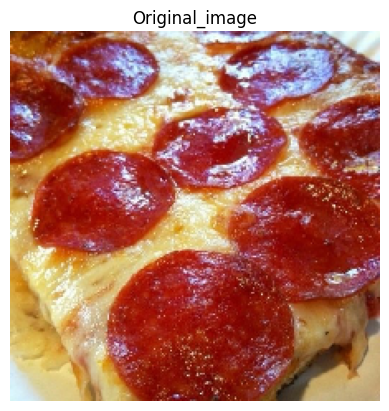

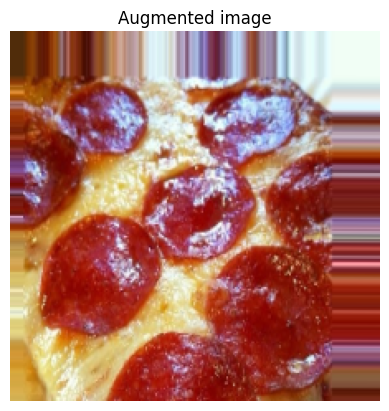

In [50]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32 ...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original_image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [51]:
# Creating a new model with augmented train data
model_6 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 427ms/step - loss: 0.7185 - accuracy: 0.5000 - val_loss: 0.6837 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 20s 420ms/step - loss: 0.6885 - accuracy: 0.5360 - val_loss: 0.6551 - val_accuracy: 0.5540
Epoch 3/5
47/47 [==============================] - 20s 430ms/step - loss: 0.6728 - accuracy: 0.6153 - val_loss: 0.6115 - val_accuracy: 0.6420
Epoch 4/5
47/47 [==============================] - 20s 432ms/step - loss: 0.6900 - accuracy: 0.6100 - val_loss: 0.6663 - val_accuracy: 0.5280
Epoch 5/5
47/47 [==============================] - 20s 419ms/step - loss: 0.6813 - accuracy: 0.6033 - val_loss: 0.5275 - val_accuracy: 0.8100


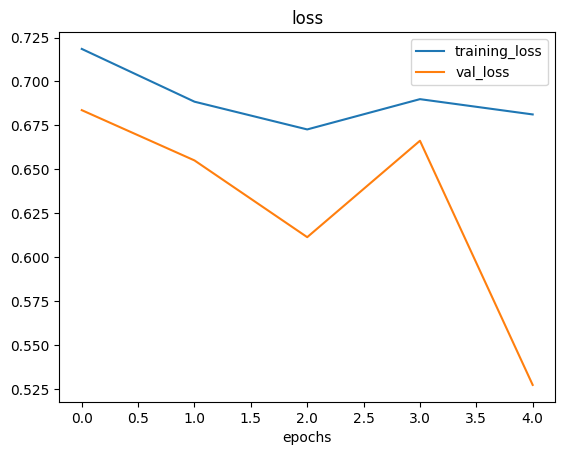

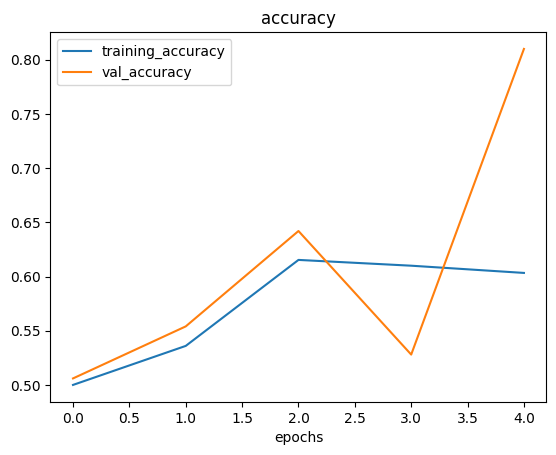

In [52]:
# Check our model training curves
plot_loss_curves(history_6)

Let's shuffle our training data and our augmented training data and train another model (the same as before) and see what happends.

In [53]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # Shuffle the data this time

Found 1500 images belonging to 2 classes.


In [54]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit our model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 408ms/step - loss: 0.6848 - accuracy: 0.5513 - val_loss: 0.6227 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 20s 435ms/step - loss: 0.5888 - accuracy: 0.6940 - val_loss: 0.4535 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 20s 432ms/step - loss: 0.5301 - accuracy: 0.7360 - val_loss: 0.3738 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 20s 419ms/step - loss: 0.4820 - accuracy: 0.7773 - val_loss: 0.3404 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 21s 439ms/step - loss: 0.4705 - accuracy: 0.7760 - val_loss: 0.3251 - val_accuracy: 0.8760


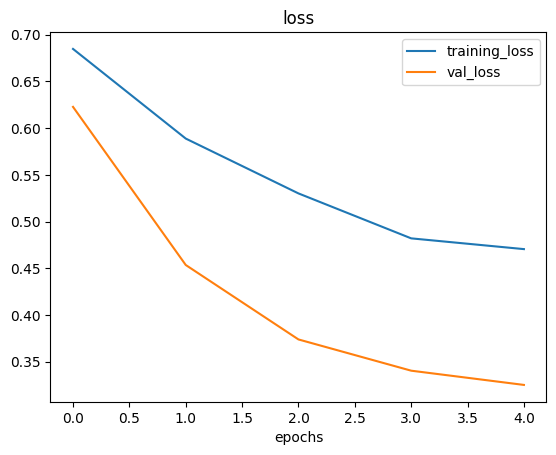

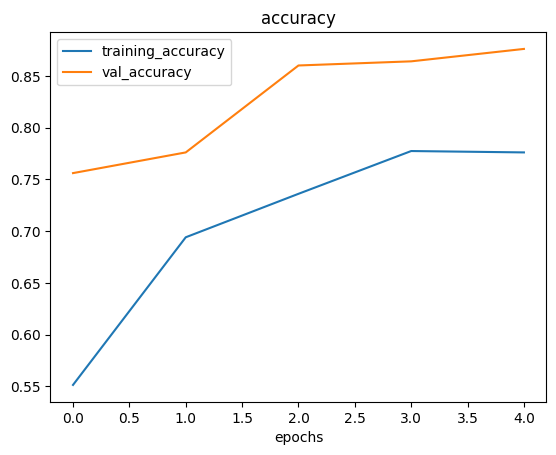

In [55]:
# Plot loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during thus enabling it to learn features across a wide array of images( in our case pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continnue to improve our model:

* Increase the number of model layers (e.g. add more Conv2D / MaxPool2D layers)
* Increase the number of filters in each convolutional layer
(e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find the ideal learning rate
* Get more data (give the model more opportinities to learn)
* Use **transfer learning*** to leverage what another image model has learn and adjust it for our own use case

**Practice:** Recreate the model on the CNN explainer website (same as model_1) and see how it performs on the augmented shuffled training data.

# Making a prediction with our trained model on our own custom data

In [56]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2024-04-05 09:08:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2024-04-05 09:08:14 (32.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



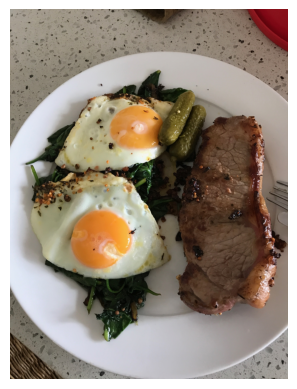

In [57]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [58]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [59]:
import tensorflow as tf

In [60]:
# Create a function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshaoes it to (img_shape, img_shape, corlour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image(get all values between 0 and 1)
  img = img/255.
  return img


In [61]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [62]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 275ms/step


array([[0.8512342]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, woudln't it be nice if we could visualize the image as well as the model's prediction?

In [63]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [64]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [65]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 17ms/step


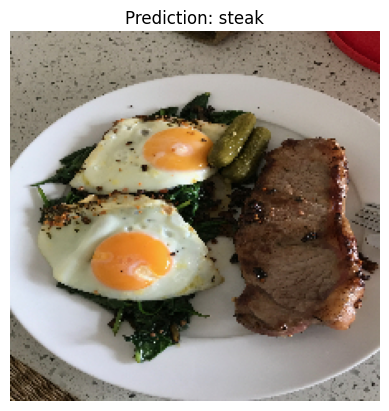

In [66]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza.

--2024-04-05 09:08:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2024-04-05 09:08:18 (41.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 17ms/step


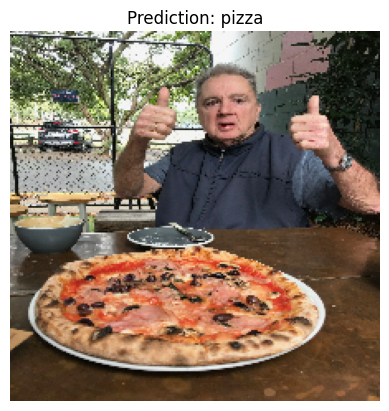

In [67]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

## Multi-class image classification

We've just been through  a bunch of folowing steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat the baseline/reduce overfitting)
7. Repeat until satisfied




# 1. Import and become one with the data

In [68]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-04-05 09:08:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.207, 173.194.213.207, 173.194.215.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.6MB/s    in 7.1s    

2024-04-05 09:08:26 (69.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [69]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.

In [70]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [71]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1594058.jpg']
image shape: (512, 512, 3)


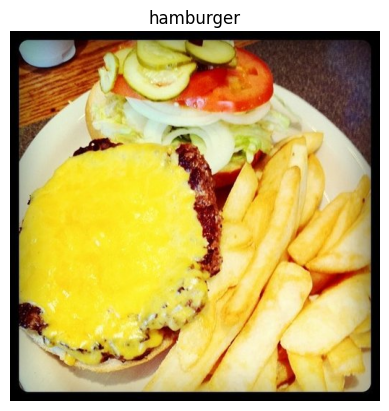

In [72]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model

the CNN explainer use 10 classes, let's replicate their model

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create a model similar to CNN explainer website.
model_8 = Sequential([
    Conv2D(10,3, input_shape=(224, 224, 3), activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # Changed to have 10 output neurons and use the softmax activation function
])


# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])



In [75]:
# Fit the model
history_8 = model_8.fit(train_data, # This is now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 129ms/step - loss: 2.1834 - accuracy: 0.1873 - val_loss: 2.0977 - val_accuracy: 0.2240
Epoch 2/5
235/235 [==============================] - 34s 145ms/step - loss: 1.9640 - accuracy: 0.3056 - val_loss: 1.8934 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 28s 118ms/step - loss: 1.6610 - accuracy: 0.4325 - val_loss: 1.9387 - val_accuracy: 0.3232
Epoch 4/5
235/235 [==============================] - 31s 133ms/step - loss: 1.1501 - accuracy: 0.6203 - val_loss: 2.0990 - val_accuracy: 0.3260
Epoch 5/5
235/235 [==============================] - 29s 124ms/step - loss: 0.5203 - accuracy: 0.8404 - val_loss: 3.1360 - val_accuracy: 0.2844


In [76]:
# Evaluate on the test ndata
model_8.evaluate(test_data)

79/79 [==============================] - 7s 86ms/step - loss: 3.1360 - accuracy: 0.2844


[3.1360204219818115, 0.28439998626708984]

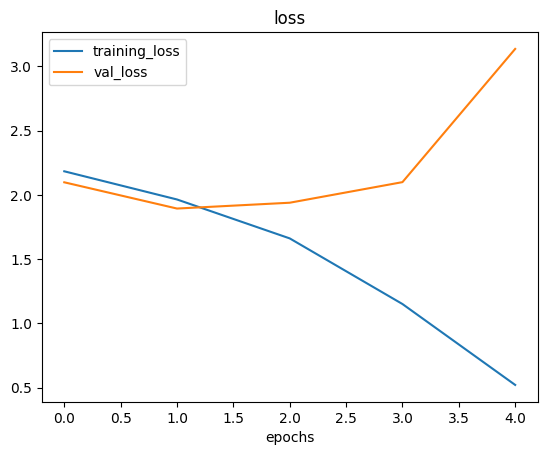

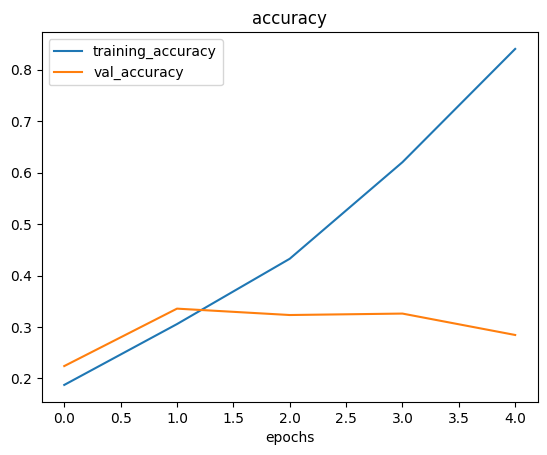

In [77]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **User transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset


In [78]:
# How about we try and simplify the model first?
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

In [79]:
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3), activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile model 9
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [80]:
# Fit the model 9
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 137ms/step - loss: 2.1114 - accuracy: 0.2368 - val_loss: 1.9577 - val_accuracy: 0.3012
Epoch 2/5
235/235 [==============================] - 28s 119ms/step - loss: 1.7607 - accuracy: 0.4023 - val_loss: 1.8301 - val_accuracy: 0.3600
Epoch 3/5
235/235 [==============================] - 27s 116ms/step - loss: 1.3659 - accuracy: 0.5596 - val_loss: 1.8614 - val_accuracy: 0.3648
Epoch 4/5
235/235 [==============================] - 27s 113ms/step - loss: 0.9082 - accuracy: 0.7227 - val_loss: 2.0743 - val_accuracy: 0.3292
Epoch 5/5
235/235 [==============================] - 26s 109ms/step - loss: 0.4886 - accuracy: 0.8713 - val_loss: 2.3496 - val_accuracy: 0.3440


In [81]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

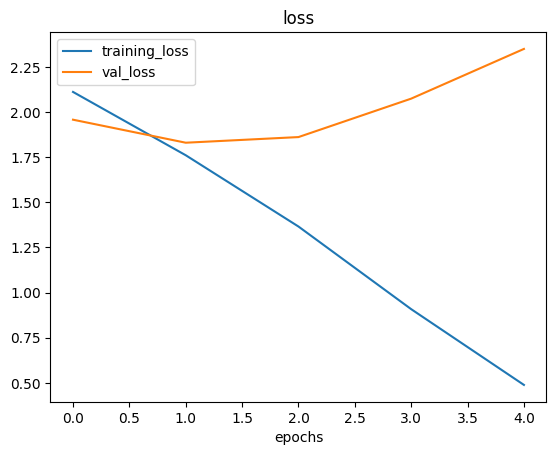

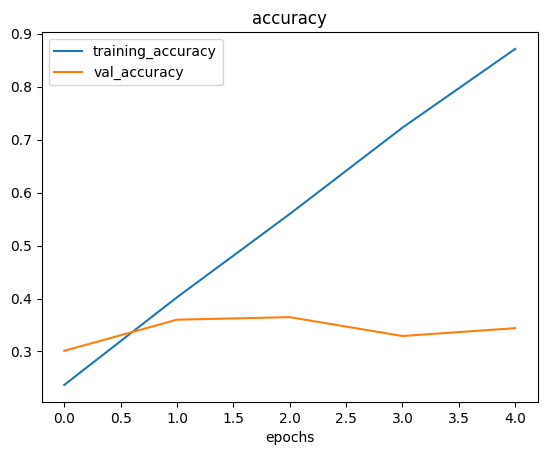

In [82]:
# Check the loss curves on model_9
plot_loss_curves(history_9)

In [83]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [84]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [86]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [88]:
# Let's create another model but this time we will fit it on the augmented train data
model_10 = tf.keras.models.clone_model(model_8)

# compile the cloned model using the same setup as previous model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 104s 431ms/step - loss: 2.1584 - accuracy: 0.2111 - val_loss: 1.9596 - val_accuracy: 0.3116
Epoch 2/5
235/235 [==============================] - 112s 477ms/step - loss: 2.0402 - accuracy: 0.2727 - val_loss: 1.9820 - val_accuracy: 0.2872
Epoch 3/5
235/235 [==============================] - 105s 448ms/step - loss: 1.9849 - accuracy: 0.2963 - val_loss: 1.8585 - val_accuracy: 0.3516
Epoch 4/5
235/235 [==============================] - 104s 441ms/step - loss: 1.9456 - accuracy: 0.3243 - val_loss: 1.8292 - val_accuracy: 0.3668
Epoch 5/5
235/235 [==============================] - 105s 447ms/step - loss: 1.9159 - accuracy: 0.3397 - val_loss: 1.7652 - val_accuracy: 0.3884


In [89]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 3.1360 - accuracy: 0.2844


[3.136019468307495, 0.28439998626708984]

In [90]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 94ms/step - loss: 1.7652 - accuracy: 0.3884


[1.7651886940002441, 0.38839998841285706]

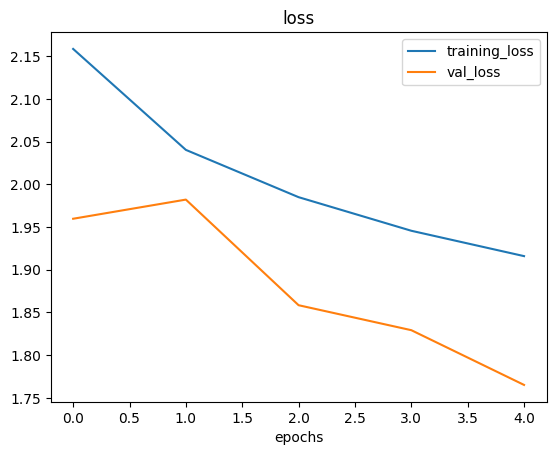

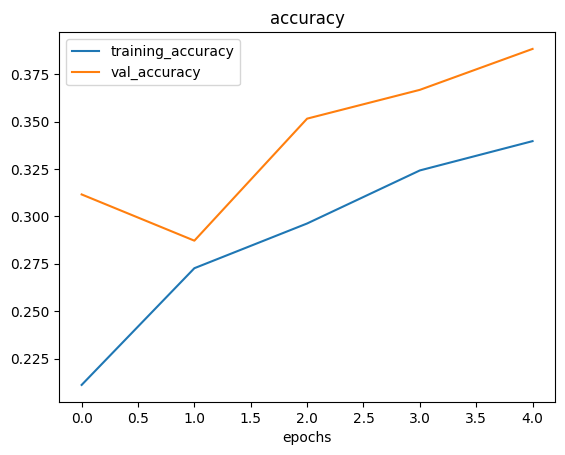

In [91]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

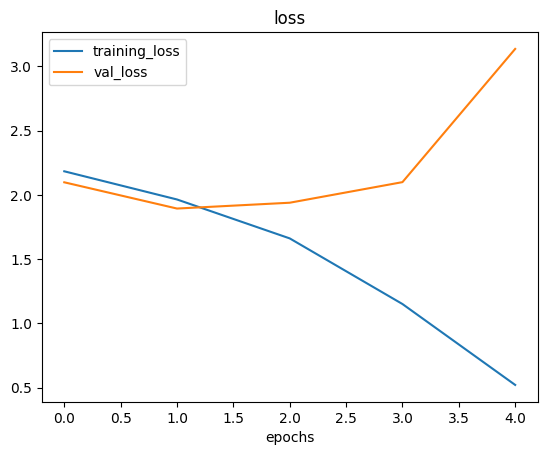

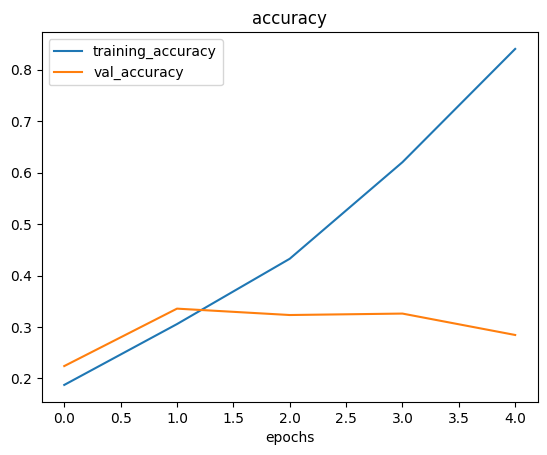

In [92]:
plot_loss_curves(history_8)

That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements

# 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/ hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. training for 10 epochs instead of 5)
- try **transfer learning**